In [1]:
import pandas as pd
import os

data_dir = r"C:\Users\hyunj\Traffic\dataset\csv_output"
file_list = [
    "간선.csv",
    "교량.csv",
    "도시고속도로.csv",
    "도심.csv",
    "시계.csv",
    "요일별.csv",
    "월별.csv",
    "주말교통량.csv",
    "주중교통량.csv"
]

dfs = {}

for file in file_list:
    file_path = os.path.join(data_dir, file)
    try:
        # cp949 인코딩으로 파일 읽기
        df = pd.read_csv(file_path, encoding='cp949')
        print(f"{file} 로드 성공: {df.shape}")
    except Exception as e:
        print(f"{file} 파일 읽기 오류: {e}")
        continue
    
    # 기본 전처리: 미리보기, 결측치 확인, 중복 제거
    print(f"--- {file} 미리보기 ---")
    print(df.head(), "\n")
    
    missing = df.isnull().sum()
    print(f"{file} 결측치 확인:")
    print(missing, "\n")
    
    before = df.shape[0]
    df.drop_duplicates(inplace=True)
    after = df.shape[0]
    print(f"{file} 중복 데이터 제거: {before - after}개 제거됨. 결과 shape: {df.shape}\n")
    
    dfs[file] = df

간선.csv 로드 성공: (46, 46)
--- 간선.csv 미리보기 ---
   지점번호          지점명  유입(차로수)  유출(차로수) 2019년 유입 2019년 유출 2019년 양방 2020년 유입  \
0  D-01    진흥로(구기터널)      2.0      2.0   45,876   22,487   23,389   43,895   
1  D-02  평창문화로(북악터널)      2.0      2.0   45,747   23,434   22,313   42,455   
2  D-03    동호로(금호터널)      2.0      2.0   67,523   33,220   34,303   63,672   
3  D-04    서빙고로(한남역)      3.0      4.0   90,527   48,168   42,359   86,945   
4  D-05    천호대로(군자교)      5.0      4.0   87,339   45,685   41,654   83,631   

  2020년 유출 2020년 양방  ... 차로수_유출.1 2022_유입 2022_유출  2022_양방  2023_유입 2023_유출  \
0   21,584   22,311  ...        2   41417   20463    20954    41213   20674   
1   21,672   20,783  ...        2   41392   21125    20267    41115   20768   
2   31,681   31,991  ...        2   60940   30903    30037    61995   31261   
3   45,522   41,423  ...        4   84932   45252    39680    84799   45084   
4   43,511   40,120  ...        4   79931   41442    38489    79570   40675   

  2023_양방 증감_

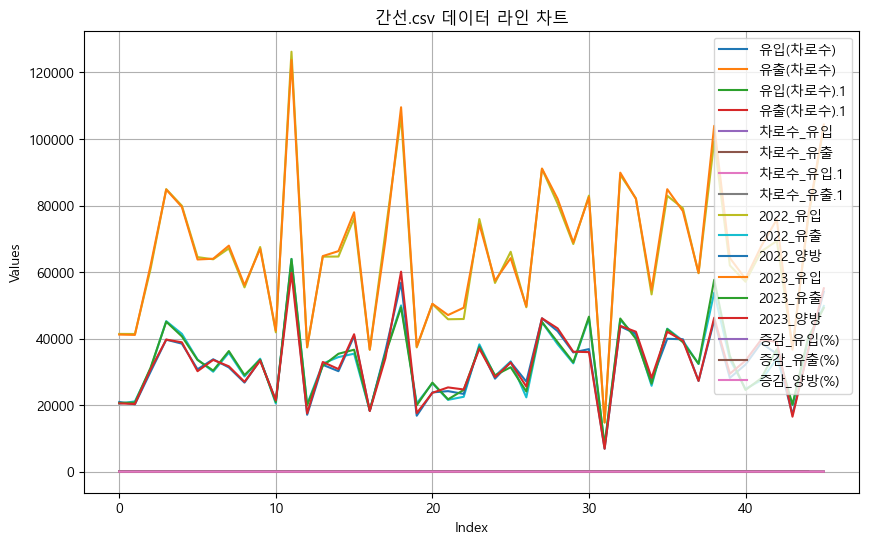

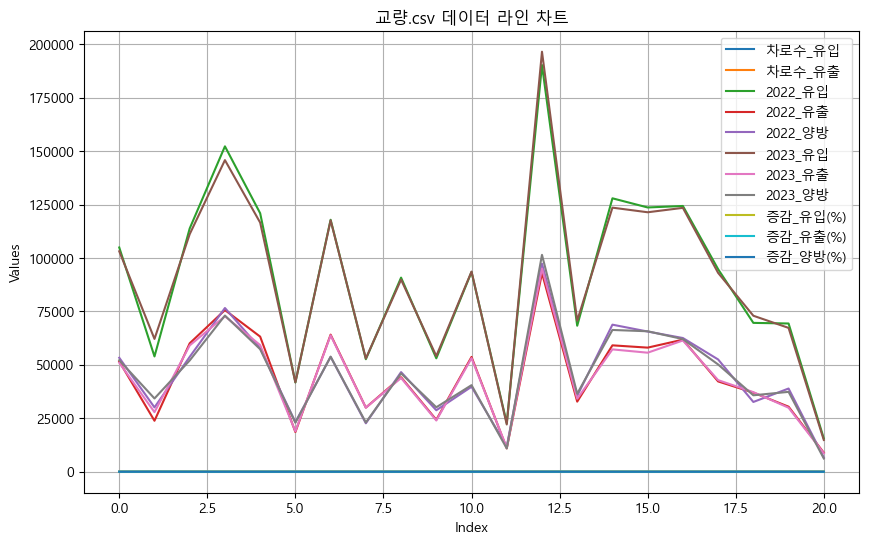

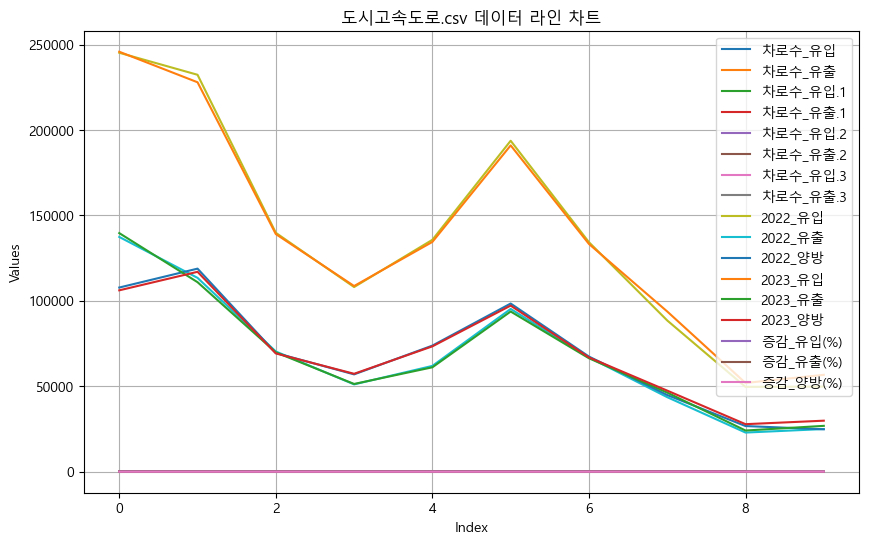

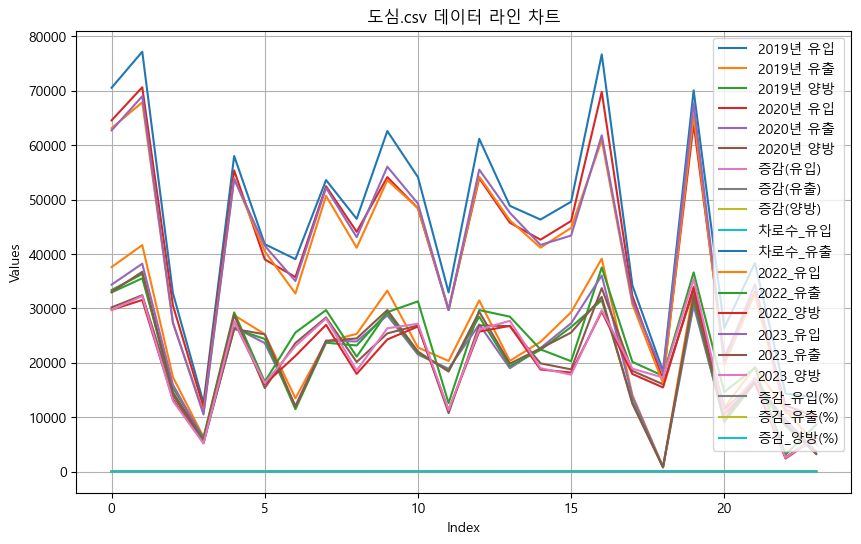

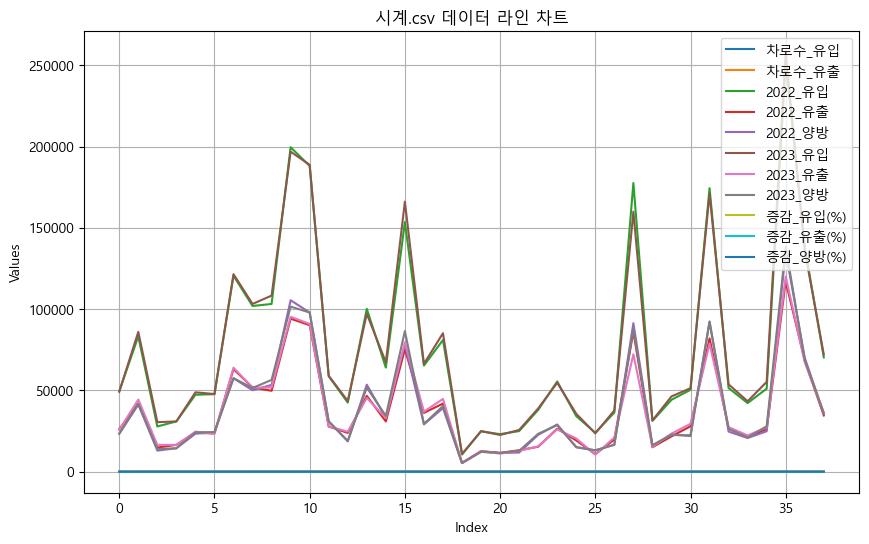

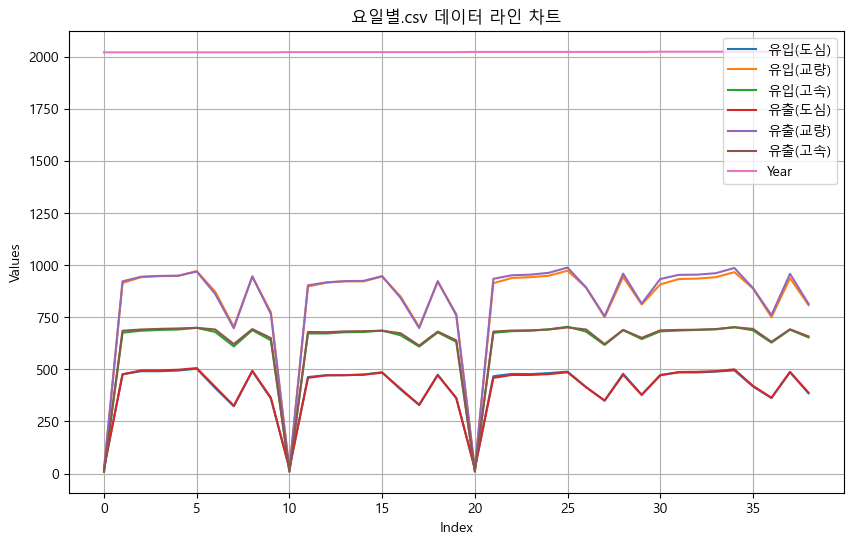

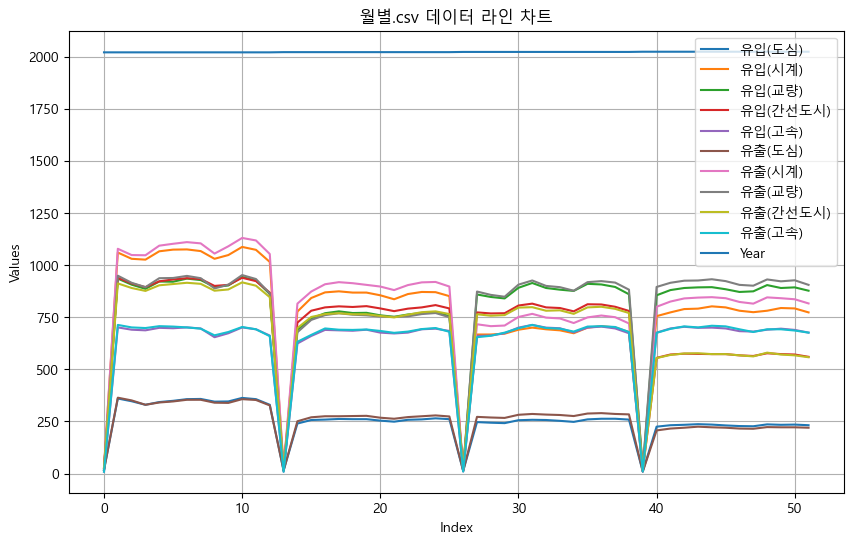

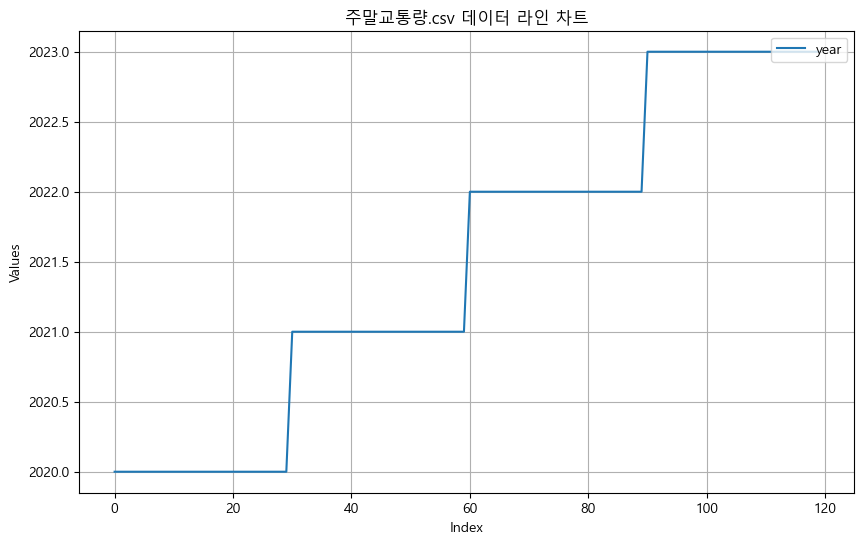

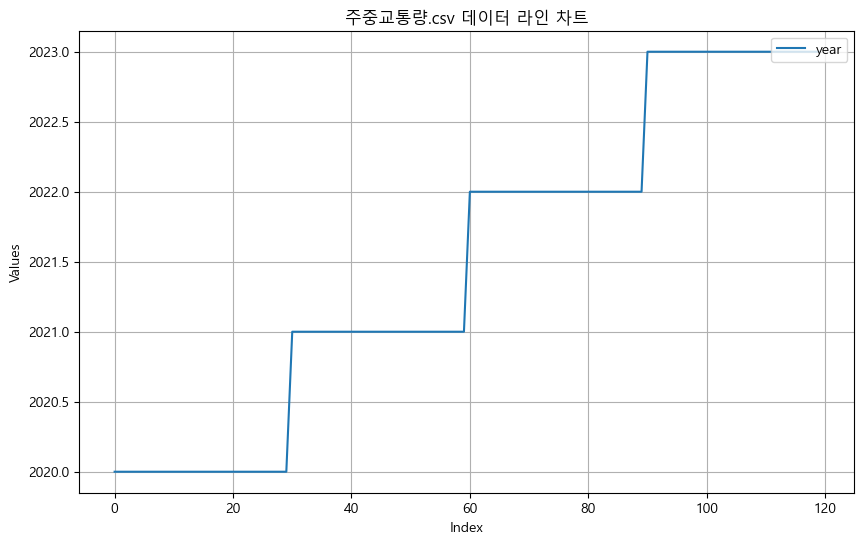

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 각 CSV 파일에 대해 라인 차트를 생성
for file_name, data in dfs.items():
    try:
        # 데이터프레임에서 숫자형 데이터만 선택
        numeric_data = data.select_dtypes(include=['number'])
        
        # 데이터가 충분히 있는 경우에만 시각화
        if not numeric_data.empty:
            plt.figure(figsize=(10, 6))
            numeric_data.plot(ax=plt.gca())
            plt.title(f"{file_name} 데이터 라인 차트")
            plt.xlabel("Index")
            plt.ylabel("Values")
            plt.legend(numeric_data.columns, loc='upper right')
            plt.grid(True)
            plt.show()
        else:
            print(f"{file_name}에는 숫자형 데이터가 없습니다.")
    except Exception as e:
        print(f"{file_name} 시각화 중 오류 발생: {e}")